In [1]:
import json
import sys
sys.path.append('./src/')
from utilities import *

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

--------------------Downloading--------------------
FASTQ files done. Time: 24 s
BAM files done. Time: 0 s
VCF files done. Time: 2 s
--------------------Processing---------------------
Processing VCF files...
Filtering VCFs... Time: 314 s
Sampling from VCF... Time: 111 s
Finding PCA... Time: 0 s
VCF files done. Time: 427 s
Creating plot...
Plot done. Saved to final_plot.png


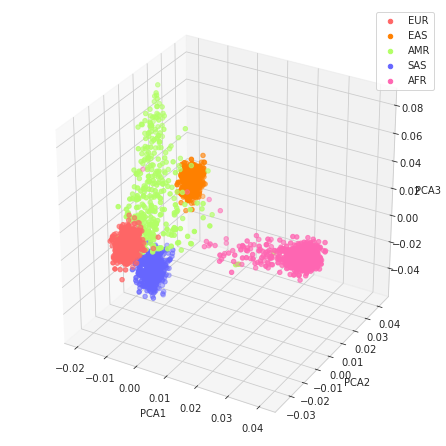

In [4]:
# Equivalent to python ./src/run.py data-test
#--------------------------------------------
# Load config
cfg = json.load(open('config/data-test.json'))

# Download data
datapath = cfg['datapath']
download(datapath, **cfg['data'])

# Process data
process(datapath, cfg['data']['ref_file'], cfg['options'])

# Introduction
<p>
    For this project, I am attempting to replicate the results found in the 1000 genomes project, clustering individuals by their population to show how geographically close populations are also genetically similar. The 1000 genomes data is a dataset containing a genome for over 1000 individuals (actually closer to 2500 individuals). The data was collected by sequencing these individuals using deep sequencing technologies. This technology became more advanced while the project was in progress, which is why they ended up being able to sequence more individuals than they expected to.
</p>

# Data ingestion
<p>
    In this project, the 1000 genomes data is ingested as their completed vcf files, which are files that combine all the genomes into one compressed format that only includes the data for areas in the genome that vary, rather than including the full genome, as this would have a lot of repetition. In this project, I filtered and merged the 1000 genomes data to only include the most common SNPs (single nucleotide polymorphisms), then clustered the data using PCA and combined that with the geographical data to show how the genetic distance is correlated with geographical population (people from the same population are genetically more similar than people from different populations).
</p>

# Specifics on filtering
<p>
    Filtering the data was rather simple, because some areas of the genome have more variation than others, I filtered the data by only including areas that had high variation (SNPs that are seen in more than 5% of the data). 
</p>

# PCA Plot
![plot](plots/final_plot.png)

# Results
<p>
    From this plot, it is clear how populations are clustered together. The PCA values are a way to numerically quantify individuals' genetic distance from each other, and the plot shows how the individuals from the same populations tend to be clustered together. It helps support belief that genetic variation tends to be dependent on population, i.e. individuals from the same population will be genetically more similar than individuals from different populations. This finding is important because when studying genetics and how variation may affect a certain phenotype, it is essential to take into account the variation that is caused simply by differences in geography, so as to not end up simply studying the variation due to geographical differences.
</p>

# Limitations
<p>
    The 1000 Genomes Project only studies a limited number of populations, and expanding the study to include more populations around the world would help to show how different populations may be more related than others. For example, bordering countries like North Korea and South Korea are likely less similar than countries like Portugal and Spain, because immigration between these neighboring countries is vastly different, and could account for less genetic closeness between populations. Additionally, for this replication I chose to randomly sample 1% of the genomes instead of using all of the variants in doing the principle component analysis for the sake of efficiency, and even with just 1% of the genome a very distinctive plot is produced. However, it is possible that with more data it would be possible to further separate populations (e.g. Japan/China/Vietnam) into their smaller populations as opposed to just the superpopulations (e.g. Europe/Asia/America)
</p>

# Conclusion
<p>
    With a relatively small amount of data, the correlation between genetic distance and geographical location is blatantly obvious. From the PCA plots, it is clear that populations are genetically clustered together and individuals are more genetically similar to people with similar ancestry than to people with different ancestry.
</p>